In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import LSTM,Dropout,Dense,Embedding
from keras import Sequential
from keras.initializers import Constant
%matplotlib inline

warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('./fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
df['title'][0]

'You Can Smell Hillary’s Fear'

In [14]:
df['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [15]:
df.shape

(6335, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [17]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0','title'],axis=1,inplace=True)
df.sample(3)

,text,label
982,by Yves Smith \nYves here. I strongly suspect ...,FAKE
1058,"Monsanto Behind 4-Years-in-the-Making, Failed ...",FAKE
2247,Report: Saxophone Still An Okay Vehicle For Se...,FAKE


In [18]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
FAKE   3164   3071                                                      36
REAL   3171   2989  Killing Obama administration rules, dismantlin...   58

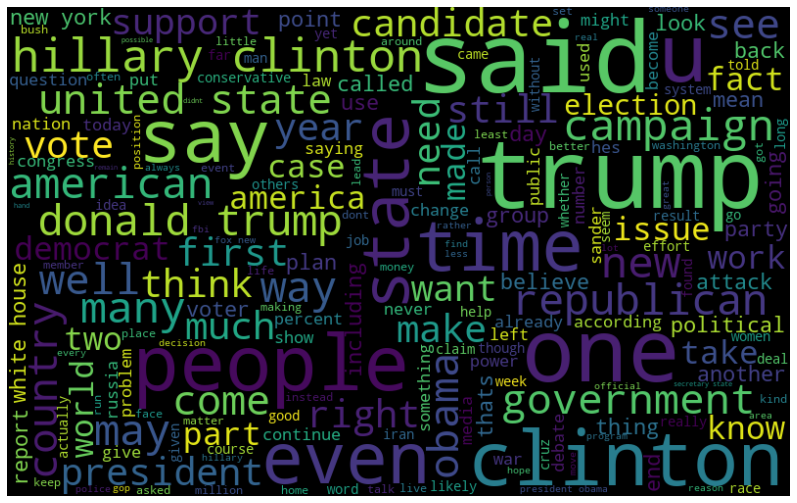

In [22]:
# Visualize the frequent words 
all_words=" ".join([sentence for sentence in df['clean_news']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

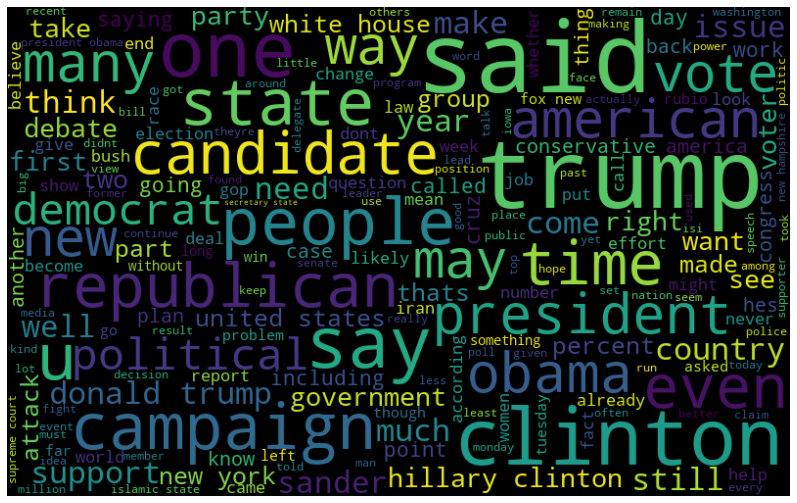

In [23]:
# Visualize the frequent news for genuine news
all_words_genuine=" ".join([sentence for sentence in df['clean_news'][df['label']=='REAL']])
wordcloud_genuine=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words_genuine)

#Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud_genuine,interpolation='bilinear')
plt.axis('off')
plt.show()

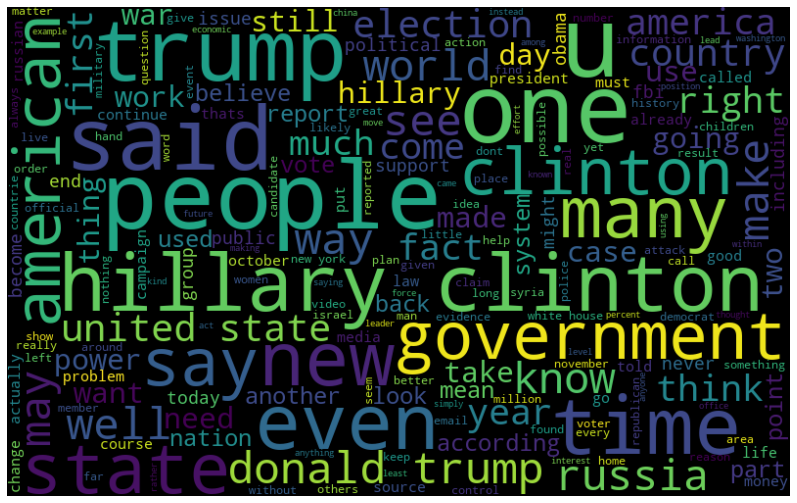

In [24]:
# Visualize the frequent words for fake news
all_words_fake=" ".join([sentence for sentence in df['clean_news'][df['label']=='FAKE']])
wordcloud_fake=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words_fake)

# Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud_fake,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# tokenize text
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

134328

In [38]:
# Padding data
sequences=tokenizer.texts_to_sequences(df['clean_news'])
padded_seq=tf.keras.utils.pad_sequences(sequences,maxlen=600,padding='post',truncating='post')

In [45]:
with open('glove.6B.100d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        print(values)
        break

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [46]:
# Create embedding index
embedding_index={}
with open('glove.6B.100d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:],dtype='float32')
        embedding_index[word]=coefs

In [51]:
# Create embedding matrix
embedding_matrix=np.zeros((vocab_size+1,100))
for word,i in word_index.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [59]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13128   , -0.45199999,  0.043399  , ..., -0.30526   ,
        -0.045495  ,  0.56509   ],
       [-0.15730999, -0.75502998,  0.36844999, ..., -0.54136997,
         0.67817003, -0.17251   ],
       ...,
       [-0.65482002, -0.64002001,  0.36364001, ...,  0.2579    ,
        -0.71521997, -0.50418001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10661   , -0.070993  , -0.1125    , ..., -0.63327998,
        -1.00650001, -0.10291   ]])

In [60]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
embedding_matrix[1]

array([-0.13128   , -0.45199999,  0.043399  , -0.99798   , -0.21053   ,
       -0.95867997, -0.24608999,  0.48413   ,  0.18178   ,  0.47499999,
       -0.22305   ,  0.30063999,  0.43496001, -0.36050001,  0.20245001,
       -0.52594   , -0.34707999,  0.0075873 , -1.04970002,  0.18673   ,
        0.57369   ,  0.43814   ,  0.098659  ,  0.38769999, -0.22579999,
        0.41911   ,  0.043602  , -0.73519999, -0.53583002,  0.19276001,
       -0.21961001,  0.42515001, -0.19081999,  0.47187001,  0.18826   ,
        0.13357   ,  0.41839001,  1.31379998,  0.35677999, -0.32172   ,
       -1.22570002, -0.26635   ,  0.36715999, -0.27586001, -0.53245997,
        0.16786   , -0.11253   , -0.99958998, -0.60706002, -0.89270997,
        0.65156001, -0.88783997,  0.049233  ,  0.67110997, -0.27553001,
       -2.40050006, -0.36989   ,  0.29135999,  1.34979999,  1.73529994,
        0.27000001,  0.021299  ,  0.14421999,  0.023784  ,  0.33643001,
       -0.35475999,  1.09210002,  1.48450005,  0.49430001,  0.15

In [62]:
padded_seq[0]

array([ 4423, 12972, 26173,  2718,  1095,   459,   373,     8,   140,
        2358,  2681,  1292,  1568,   615,  3796,    26,    15,  3688,
           3,   988,    51,   120,   856,  1853,  3343,   112,   330,
          26,  3005,  1287,    71,  1853,   211,   237,    24,    31,
          84,    51,   120,    83,   794,    15,     6,   302, 26174,
        2410,  4943,  1629,  1535,   347,  2046, 12973,     4,  2642,
         120,   316,   777,   540,  1064,  1931,    26,   120,   203,
         482,    19,   347,  1064,     6,  7345,   724,  2009,   540,
         901,    61,   758,  3137, 21904,  2438,     2,   854,  2822,
          70,   760,   414,   300,   203,  2252,   120,  3006,   662,
        1175,   508,  3838,   383,   796,  1578,  6619,   323,    30,
          15,  3006,  3090,  1427,    61,    88, 12212,   568,   473,
         236,     3,   395,    15,     3,  5546,  1913,   120,   996,
         242,  2823,     6,   988, 55393,    73,     8,   140,   123,
        1161,   540,

In [66]:
df['label']=df['label'].replace({'FAKE':0,'REAL':1})
df.sample(5)

,text,label,clean_news
6114,"\nAccording to a new Wikileaks email leak , a ...",0,according new wikileaks email leak clinton sta...
270,"By Brig Asif H. Raja on October 31, 2016 \nAsi...",0,brig asif h raja october 31 2016 asif haroon r...
2038,Hillary Rodham Clinton sought to cement her st...,1,hillary rodham clinton sought cement standing ...
286,From an Indiana pizzeria to a Washington State...,1,indiana pizzeria washington state florist amer...
4923,"Bk November 7, 2016 @ 5:00 am \nI have time th...",0,bk november 7 2016 500 time thinking move city...


In [67]:
X_train,X_test,y_train,y_test=train_test_split(padded_seq,df['label'],test_size=0.2,random_state=42,stratify=df['label'])

In [68]:
X_train[0]

array([   11,    19,  1148,  4263,    59,    15,     3,    46,    57,
         342,   334,  5928,  3447,  1679, 42628,    11,   467,    19,
        4685,    46,    36,    77,    15,     3,  2189,   899,    11,
         863,    46,    57,   342,  1874, 13542,   774,  1124, 61877,
          19,   780,  3592,  3447,  1679,    86,   250,   334,   238,
          46,    57,   342, 15859, 42629, 26777,  2104,   882,   349,
          21, 61878,    19,  1148,  4263,  1958,    15,     3,   141,
        1619,  3378,    11, 17428,   353,   342,  1874,  3068,  3016,
        1548,  1760,  8276,    55,   780,    21,   211,    48, 12013,
        3592,   356,    86,   234,    19,     1,   353,  6963,  4832,
        7584,   373,    86,   144,   190,    86,   144,   419,     1,
        1848,   327,    67,  1471,    34,    86,   190, 24087,  1471,
        1770, 11686,  4767,    48,     2,    11, 61879,  1830,     3,
        5762,   155,    10,    22,  1944,   563,    22,   434,  1685,
          36,   370,

In [69]:
y_train[0]

0